# Solar Radiation
mainly uses the sun module

Import the standard modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
try:
    import photovoltaic as pv
except:
    print('attempting to install photovoltaic')
    !pip install photovoltaic
    import photovoltaic as pv

## Blackbody Radiation
Emission at a single wavelength

In [5]:
wavelength = 600  # (nm)
print(pv.sun.blackbody_spectrum(wavelength))  # just a single variable, using default T = 6000 K

90089.41755704962


plot the blackbody radiation as a function of wavelength

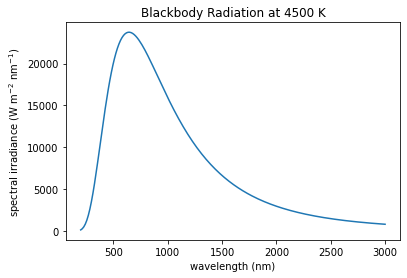

In [3]:
wavelength = np.linspace(200, 3000, 200)  # 200 eo 3000 nm, 200 points
temperature = 4500  # (K)

plt.figure('blackbody_plot')
plt.plot(wavelength, pv.sun.blackbody_spectrum(wavelength, temperature))
plt.xlabel('wavelength (nm)')  # add axis labels and plot title
plt.ylabel('spectral irradiance (W m$^{-2}$ nm$^{-1}$)')  # tex formating works in Matplotlib but not for all strings.
plt.title('Blackbody Radiation at ' + str(temperature) + ' K')
plt.savefig('blackbody_plot.png')
plt.show()

## Standard Spectra of AM0 and AM1.5

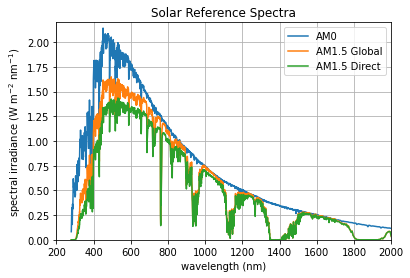

In [6]:
wavelength, AM0, AM15G, AM15D = pv.sun.solar_spectra()

plt.figure('plot_solar_reference_spectra')
plt.plot(wavelength,AM0, label="AM0")
plt.plot(wavelength,AM15G, label="AM1.5 Global")
plt.plot(wavelength, AM15D, label="AM1.5 Direct")
plt.legend(loc='upper right')
plt.ylim(0, 2.2)
plt.xlim(200, 2000)
plt.grid(True)
plt.xlabel('wavelength (nm)')       #  add axis labels and plot title
plt.ylabel('spectral irradiance (W m$^{-2}$ nm$^{-1}$)')
plt.title('Solar Reference Spectra')
# plt.savefig('plot_solar_reference_spectra.png')
plt.show()


The standard spectra is in 1 nm spacing. Often other spacings are needed such as when integrating a QE curve.
The function pv.sun.equal_spacing to gives the spectra with uniform spacingas designated by the user. 

In [9]:
wavelength_10nm, AM15G_10nm = pv.sun.equal_spacing(wavelength, AM15G, 300, 1200, 10)
wavelength_100nm, AM15G_100nm = pv.sun.equal_spacing(wavelength, AM15G, 300, 2000, 50)
wavelength_500nm, AM15G_500nm = pv.sun.equal_spacing(wavelength, AM15G, 300, 2000, 200)

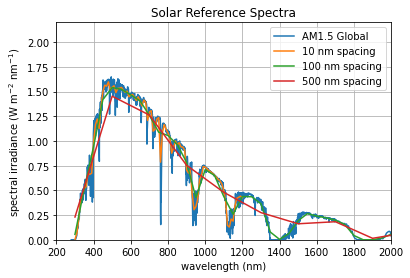

In [11]:
plt.figure('plot_solar_reference_spectra')
plt.plot(wavelength,AM15G, label="AM1.5 Global")
plt.plot(wavelength_10nm, AM15G_10nm/10, label="10 nm spacing")
plt.plot(wavelength_100nm, AM15G_100nm/50, label="100 nm spacing")
plt.plot(wavelength_500nm, AM15G_500nm/200, label="500 nm spacing")
plt.legend(loc='upper right')
plt.ylim(0, 2.2)
plt.xlim(200, 2000)
plt.grid(True)
plt.xlabel('wavelength (nm)')       #  add axis labels and plot title
plt.ylabel('spectral irradiance (W m$^{-2}$ nm$^{-1}$)')
plt.title('Solar Reference Spectra')
#plt.savefig('plot_solar_reference_spectra.png')
plt.show()